In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [5]:
data_clean = pd.read_csv('data_clean.csv')

X = data_clean.drop('Target', axis=1)
y = data_clean['Target']

X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

#### Multicollinearity

##### Look at assocation strength between variables

Since the dataset has mixed nominal and numeric variables, we can't use a default correlation matrix but must instead build one using multiple different measures of association. <br><br>

nominal: cramer's v <br>
numeric: correlation (take absolute value so all measures are [0,1] )<br>
nominal - numeric: Eta of ANOVA <br><br>

When researching this problem, I came across two statistics used to measure nominal - numeric associations: <br>
Rank-biserial correlation works when the nominal variable is dichotomous, which most of ours are not.
Eta of ANOVA is suitable for a non-dichotomous nominal variable vs. an interval variable. Thankfully, all of our non-nominal features are interval.

##### Construct an association heatmap

In [4]:
from sklearn.metrics import r2_score 
from scipy.stats.contingency import association

def getMatrix(data):
    nominal = [
            'Marital status',      
            'Application mode',          
            'Application order',         
            'Course',                    
            'Daytime/evening attendance',
            'Previous qualification',    
            'Nationality',               
            "Mother's qualification",    
            "Father's qualification",    
            "Mother's occupation",       
            "Father's occupation",       
            'Displaced',              
            'Educational special needs', 
            'Debtor',                    
            'Tuition fees up to date',   
            'Gender',                                              
            'Scholarship holder',                                  
            'International',
            'Target'
            ]
    

    def assocation(var1, var2):

        #variable against itself
        if var1 == var2: 
            return 1.0
        else:
            #cramers v
            if (var1 in nominal) and (var2 in nominal): 
                contingency = pd.crosstab(data[var1], data[var2])
                return association(contingency, 'cramer') 
            else:
                #correlation
                return data[var1].corr(data[var2], method='spearman') 

    matrix = pd.DataFrame(columns=data.columns,
                        index=data.columns)

    for var1 in data.columns:
        for var2 in data.columns:
            matrix.at[var1, var2] = abs(assocation(var1, var2))

    matrix = matrix.astype('float')
    matrix = matrix.drop('Target', axis=0)
    matrix = matrix.drop('Target', axis=1)

    return matrix


<AxesSubplot:>

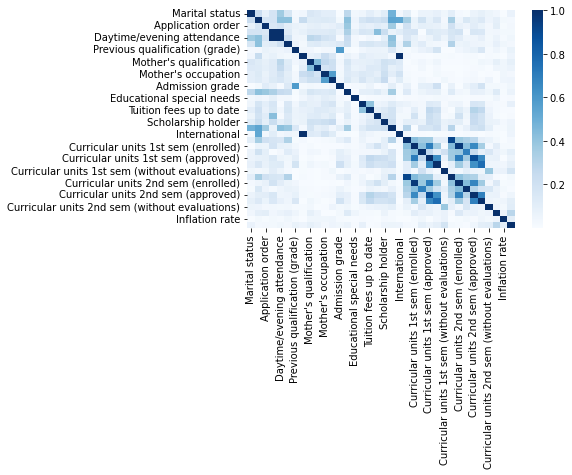

In [5]:
#display heatmap

matrix = getMatrix(data_clean)
sns.heatmap(matrix, cmap='Blues')


##### Scaling

To scale the data I choose to normalize it to the range [0, 1] so that it matches the scale of the ordinal features. 

In [8]:
from sklearn.preprocessing import MinMaxScaler

nominal = [
            'Marital status',      
            'Application mode',          
            'Application order',         
            'Course',                    
            'Daytime/evening attendance',
            'Previous qualification',    
            'Nationality',               
            "Mother's qualification",    
            "Father's qualification",    
            "Mother's occupation",       
            "Father's occupation",       
            'Displaced',              
            'Educational special needs', 
            'Debtor',                    
            'Tuition fees up to date',   
            'Gender',                                              
            'Scholarship holder',                                  
            'International',
            'Target'
            ]

data_scaled = data_clean.copy()

scaler = MinMaxScaler()

for var in data_scaled.columns:
        
    if var not in nominal:
        raw = data_scaled[var].to_numpy()
        raw = raw.reshape(-1, 1)

        scaler.fit(raw)
        scaled = scaler.transform(raw)
        data_scaled[var] = scaled

data_scaled.to_csv('data_scaled.csv', index=False)
data_scaled

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,0.284211,1,19,12,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,0.315789,1,1,1,...,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,0
4420,1,1,2,9773,1,1,0.263158,105,1,1,...,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,1
4421,1,1,1,9500,1,1,0.621053,1,37,37,...,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,1
4422,1,1,1,9147,1,1,0.894737,1,37,37,...,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,0


##### One hot encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

#list of nominal variables
nominal = [
            'Marital status',      
            'Application mode',          
            'Application order',         
            'Course',                    
            'Daytime/evening attendance',
            'Previous qualification',    
            'Nationality',               
            "Mother's qualification",    
            "Father's qualification",    
            "Mother's occupation",       
            "Father's occupation",       
            'Displaced',              
            'Educational special needs', 
            'Debtor',                    
            'Tuition fees up to date',   
            'Gender',                                              
            'Scholarship holder',                                  
            'International',
            'Target'
            ]

#initialize encoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

#encode nominal columns
one_hot_encoded = encoder.fit_transform(data_scaled[nominal])

#convert result to df
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(nominal))

#add results to full data
data_one_hot = pd.concat([data_scaled, one_hot_df], axis=1)

#drop original nominal columns
data_one_hot = data_one_hot.drop(nominal, axis=1)

data_one_hot.to_csv('data_one_hot.csv', index=False)

data_one_hot


,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1,Target_1
0,0.284211,0.340000,0.056604,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.684211,0.500000,0.037736,0.0,0.230769,0.133333,0.230769,0.741722,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.284211,0.313684,0.037736,0.0,0.230769,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.284211,0.258947,0.056604,0.0,0.230769,0.177778,0.230769,0.711447,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.052632,0.489474,0.528302,0.0,0.230769,0.200000,0.192308,0.653422,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.315789,0.286316,0.037736,0.0,0.230769,0.155556,0.192308,0.720530,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4420,0.263158,0.252632,0.018868,0.0,0.230769,0.133333,0.230769,0.635762,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4421,0.621053,0.573684,0.245283,0.0,0.269231,0.177778,0.269231,0.790066,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4422,0.894737,0.618947,0.056604,0.0,0.192308,0.111111,0.192308,0.731126,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
